# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [2]:
43

43

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# There is no missing data, though the object features will have to change in preprocessing
# and the numeric features will need to be scaled.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# The goal is to build a model for what qualities in a targeted consumer contribute to
# a successful marketing campaign. The feature "y" denotes if a customer purchased
# the marketed product and the other features should be considered for their ability
# to predict that outcome.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [9]:
onehot = OneHotEncoder(drop='if_binary')
onehot_encoded = onehot.fit_transform(df)
onehot_encoded.data

array([1., 1., 1., ..., 1., 1., 1.])

In [10]:
df.select_dtypes('number').columns.tolist()

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [11]:
numerical_features = df.select_dtypes('number').columns.tolist()
categorical_features = df.select_dtypes('object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='if_binary'), categorical_features)
    ]
)
preprocessed_data = preprocessor.fit_transform(df)
preprocessed_data

array([[ 1.53303429,  0.01047142, -0.56592197, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.62899323, -0.42150051, -0.56592197, ...,  1.        ,
         0.        ,  0.        ],
       [-0.29018564, -0.12451981, -0.56592197, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.38152696,  0.70856893, -0.56592197, ...,  1.        ,
         0.        ,  1.        ],
       [ 3.26029527, -0.07438021,  0.15610492, ...,  0.        ,
         0.        ,  0.        ]])

In [12]:
onehotencoder = preprocessor.named_transformers_['cat']
onehot_columns = onehotencoder.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(onehot_columns)
preprocessed = pd.DataFrame(preprocessed_data, columns=feature_names)
preprocessed

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X, y = preprocessed.drop('y_yes', axis=1), preprocessed['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [15]:
from sklearn.dummy import DummyClassifier

In [16]:
dummy_classifier = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [17]:
# The value expressed below is the baseline performance we should be aiming to beat.
dummy_classifier.score(X_test, y_test)

0.8865015780529255

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [18]:
from sklearn.linear_model import LogisticRegression
import time

In [19]:
logreg = LogisticRegression()

start_time = time.time()
logreg.fit(X_train, y_train)
end_time = time.time()
lr_fitting_time = end_time - start_time

print("Fit Time: " + str(lr_fitting_time))

Fit Time: 0.22214412689208984


### Problem 9: Score the Model

What is the accuracy of your model?

In [20]:
lr_train_score = logreg.score(X_train, y_train)
lr_test_score = logreg.score(X_test, y_test)

print("Logistic Regression Train Score: " + str(lr_train_score))
print("Logistic Regression Test Score: " + str(lr_test_score))

Logistic Regression Train Score: 0.911896813353566
Logistic Regression Test Score: 0.911143481427531


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)

start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
knn_fitting_time = end_time - start_time

knn_train_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)

print("KNN Train Score: " + str(knn_train_score))
print("KNN Test Score: " + str(knn_test_score))
print("Fit Time: " + str(knn_fitting_time))

KNN Train Score: 0.9403945371775417
KNN Test Score: 0.8943918426802622
Fit Time: 0.008411169052124023


In [23]:
svc = SVC()

start_time = time.time()
svc.fit(X_train, y_train)
end_time = time.time()
svc_fitting_time = end_time - start_time

svc_train_score = svc.score(X_train, y_train)
svc_test_score = svc.score(X_test, y_test)

print("SVC Train Score: " + str(svc_train_score))
print("SVC Test Score: " + str(svc_test_score))
print("Fit Time: " + str(svc_fitting_time))

SVC Train Score: 0.9227921092564492
SVC Test Score: 0.9116290361738286
Fit Time: 7.572618722915649


In [24]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=42)

start_time = time.time()
dtree.fit(X_train, y_train)
end_time = time.time()
tree_fitting_time = end_time - start_time

tree_train_score = dtree.score(X_train, y_train)
tree_test_score = dtree.score(X_test, y_test)

print("Tree Train Score: " + str(tree_train_score))
print("Tree Test Score: " + str(tree_test_score))
print("Fit Time: " + str(tree_fitting_time))

Tree Train Score: 0.9198482549317147
Tree Test Score: 0.913814032532168
Fit Time: 0.06813788414001465


In [25]:
results = {'model': ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree'],
           'train score': [lr_train_score, knn_train_score, svc_train_score, tree_train_score],
           'test score': [lr_test_score, knn_test_score, svc_test_score, tree_test_score],
           'fit time': [lr_fitting_time, knn_fitting_time, svc_fitting_time, tree_fitting_time]}
results_df = pd.DataFrame(results).set_index('model')
results_df

,train score,test score,fit time
model,,,
Logistic Regression,0.911897,0.911143,0.222144
KNN,0.940395,0.894392,0.008411
SVC,0.922792,0.911629,7.572619
Decision Tree,0.919848,0.913814,0.068138


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [26]:
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')
warnings.filterwarnings('ignore', 'ValueError: Solver lbfgs supports only*')
warnings.filterwarnings('ignore', 'ConvergenceWarning*')
warnings.filterwarnings('ignore', 'UserWarning: Setting penalty=None will ignore*')

In [27]:
lr_coef_by_name = pd.DataFrame(logreg.coef_, columns=feature_names[:-1])
lr_coef_by_name

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.004321,1.205534,-0.139414,-0.198688,-0.030136,-2.571245,1.102064,0.067503,0.745064,0.141475,...,-0.081688,-0.015238,-0.211503,-0.309905,-0.108841,-0.075099,-0.031956,-0.660645,-0.247569,0.170911


In [28]:
lr_coefs = []
for index, value in enumerate(feature_names[:-1]):
    lr_coefs.append((value, logreg.coef_[0][index]))

lr_coefs_sorted = sorted(lr_coefs, key=lambda x: abs(x[1]), reverse=True)
lr_coefs_sorted

[('emp.var.rate', -2.57124522866077),
 ('month_mar', 1.6513864511324563),
 ('duration', 1.2055341370781287),
 ('cons.price.idx', 1.102064233357924),
 ('month_may', -0.8130913899539758),
 ('month_nov', -0.766587749789999),
 ('euribor3m', 0.7450641793284768),
 ('month_jun', -0.6726711074919851),
 ('poutcome_failure', -0.6606449733225882),
 ('contact_telephone', -0.6394536017569608),
 ('month_aug', 0.5114001832983445),
 ('default_unknown', -0.49675784148969493),
 ('job_unknown', -0.3199526700889188),
 ('month_apr', -0.30993194016611825),
 ('day_of_week_mon', -0.3099048998888765),
 ('job_self-employed', -0.2766170899951944),
 ('loan_yes', -0.26355898283408924),
 ('housing_yes', -0.26046122134462624),
 ('poutcome_nonexistent', -0.24756926622492392),
 ('housing_no', -0.23994701872622237),
 ('housing_unknown', -0.2368947656608257),
 ('loan_unknown', -0.2368947656608257),
 ('loan_no', -0.2368492572367606),
 ('job_retired', 0.2345099058667731),
 ('default_no', -0.22687714624485159),
 ('marital_

[Text(0.4923155737704918, 0.9285714285714286, 'nr.employed <= -1.099\ngini = 0.2\nsamples = 32950\nvalue = [29245, 3705]\nclass = churn'),
 Text(0.24692622950819673, 0.7857142857142857, 'duration <= -0.358\ngini = 0.494\nsamples = 3976\nvalue = [2199, 1777]\nclass = churn'),
 Text(0.13114754098360656, 0.6428571428571429, 'pdays <= -5.109\ngini = 0.274\nsamples = 1440\nvalue = [1204, 236]\nclass = churn'),
 Text(0.06557377049180328, 0.5, 'day_of_week_mon <= 0.5\ngini = 0.478\nsamples = 190\nvalue = [115, 75]\nclass = churn'),
 Text(0.03278688524590164, 0.35714285714285715, 'duration <= -0.504\ngini = 0.498\nsamples = 137\nvalue = [73, 64]\nclass = churn'),
 Text(0.01639344262295082, 0.21428571428571427, 'emp.var.rate <= -1.548\ngini = 0.455\nsamples = 80\nvalue = [52, 28]\nclass = churn'),
 Text(0.00819672131147541, 0.07142857142857142, 'gini = 0.492\nsamples = 64\nvalue = [36, 28]\nclass = churn'),
 Text(0.02459016393442623, 0.07142857142857142, 'gini = 0.0\nsamples = 16\nvalue = [16, 

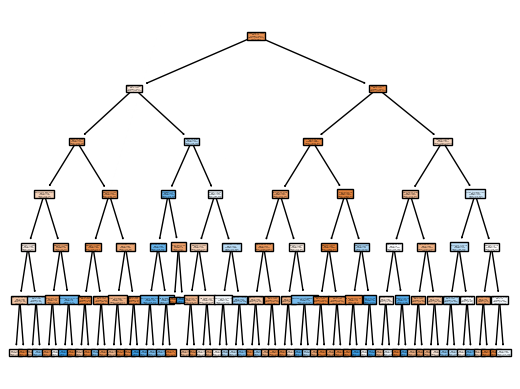

In [40]:
from sklearn import tree

tree.plot_tree(dtree, 
                   feature_names=feature_names[:-1],  
                   class_names=['churn', 'no churn'],
                   filled=True)

In [38]:
from sklearn.model_selection import GridSearchCV

lr_grid = GridSearchCV(logreg, param_grid={
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100]
}, cv=3)
lr_grid.fit(X, y)
lr_best = lr_grid.best_estimator_
lr_grid.best_params_

/Users/ezekielabuhoff/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ezekielabuhoff/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ezekielabuhoff/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ezekielabuhoff/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

{'C': 0.01, 'penalty': 'l2'}

In [35]:
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid={
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15]
}, cv=3)
knn_grid.fit(X, y)
knn_best = knn_grid.best_estimator_
knn_grid.best_params_

{'n_neighbors': 15}

In [36]:
svc_grid = GridSearchCV(SVC(), param_grid={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}, cv=3)
svc_grid.fit(X, y)
svc_best = svc_grid.best_estimator_
svc_grid.best_params_

{'kernel': 'sigmoid'}

In [37]:
tree_grid = GridSearchCV(dtree, param_grid={
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}, cv=3)
tree_grid.fit(X, y)
tree_best = tree_grid.best_estimator_
tree_grid.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [44]:
print('Logistic Regression Grid Model Score: ' + str(lr_best.score(X_test, y_test)))
print('KNN Grid Model Score: ' + str(knn_best.score(X_test, y_test)))
print('Support Vector Classifier Model Score: ' + str(svc_best.score(X_test, y_test)))
print('Decision Tree Grid Model Score: ' + str(tree_best.score(X_test, y_test)))

Logistic Regression Grid Model Score: 0.911750424860403
KNN Grid Model Score: 0.9156348628307842
Support Vector Classifier Model Score: 0.8665938334547221
Decision Tree Grid Model Score: 0.902282107307599


In [ ]:
# The grids I used for each model sometimes produced interesting variations on the
# initial models, but didn't vastly improve upon the initial models' scores.
# The greatest improvement was for logistic regression, where the score moved
# from 0.9111 to 0.9175 by using a C value of 0.01 and l2 as the penalty.
# This shift is so modest that I suspect further experimentation with
# hyperparameters or perhaps better preprocessing of the data could yield superior results.

##### Questions